# Milestone 2
# Analyzing the Demand for Bike Sharing

Bike-sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/Users/mohamedalbasuony/Downloads/bike+sharing+dataset/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 **Features:**

1. We will create dummy variables for categorical features like season, mnth, weekday, and workingday.
2. We will also consider creating interaction terms between features to capture potential non-linear relationships.

In [3]:
# Choose the target variable
target_variable = 'cnt'

# Select features and target variable
X = df.drop(columns=['instant', 'dteday', 'cnt'])  # Drop irrelevant columns
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Building and Evaluation**
- We will explore three different models:
**1. Linear Regression:**

In [4]:
# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Linear Regression):", mse_lr)

# For example, let's try dropping 'holiday' and 'weekday' columns
X_train_subset = X_train.drop(columns=['holiday', 'weekday'])
X_test_subset = X_test.drop(columns=['holiday', 'weekday'])

# Fit the model with the subset of features
lr_model_subset = LinearRegression()
lr_model_subset.fit(X_train_subset, y_train)

# Predict on the testing set
y_pred_test_subset = lr_model_subset.predict(X_test_subset)

# Evaluate the model with the subset of features
mse_lr_subset = mean_squared_error(y_test, y_pred_test_subset)
print("Mean Squared Error (Linear Regression - Subset):", mse_lr_subset)

Mean Squared Error (Linear Regression): 3.605160708504077e-24
Mean Squared Error (Linear Regression - Subset): 4.261224404024935e-25


**Observations:**
1. Linear Regression (Full Model)
- Pros:
- Very low MSE, indicating accurate predictions.
- Relatively simple and easy to interpret.
- Cons:
- May be overfitting the data
- Might not capture non-linear relationships between features and the target variable.
  
2. Linear Regression (Subset Model)
- Pros:
- Slightly lower MSE than the full model, suggesting improved accuracy.
More efficient, as it uses fewer features.

**2. Decision Tree Regression:**

In [5]:
# Fit the decision tree regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_test_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_test_dt)
print("Mean Squared Error (Decision Tree Regression):", mse_dt)

Mean Squared Error (Decision Tree Regression): 44543.42857142857


**Observations:**
1. Decision Tree Regression
- Pros:
- Can handle non-linear relationships between features and the target variable.
Relatively robust to outliers.
- Cons:
- High MSE, indicating poor predictive accuracy and that can be difficult to interpret the model's decision-making process.

**3. K-Nearest Neighbors Regression:**

In [6]:
# Fit the K-nearest neighbors regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_test_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_test_knn)
print("Mean Squared Error (K-Nearest Neighbors Regression):", mse_knn)

Mean Squared Error (K-Nearest Neighbors Regression): 6252.421224489792


**Observations:**

1. K-Nearest Neighbors Regression
- Pros:
- Relatively simple and easy to implement.
- Can capture complex relationships between features and the target variable.
- Cons:
- High MSE, indicating poor predictive accuracy, which means it can be sensitive to outliers and noisy data.

In [7]:
from sklearn.metrics import r2_score

# Linear Regression (Full Model)
y_pred_test_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_test_lr)
print("R-squared (Linear Regression):", r2_lr)

# Linear Regression (Subset Model)
y_pred_test_subset = lr_model_subset.predict(X_test_subset)
r2_lr_subset = r2_score(y_test, y_pred_test_subset)
print("R-squared (Linear Regression - Subset):", r2_lr_subset)

# Decision Tree Regression
y_pred_test_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_test_dt)
print("R-squared (Decision Tree Regression):", r2_dt)

# K-Nearest Neighbors Regression
y_pred_test_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_test_knn)
print("R-squared (K-Nearest Neighbors Regression):", r2_knn)

R-squared (Linear Regression): 1.0
R-squared (Linear Regression - Subset): 1.0
R-squared (Decision Tree Regression): 0.9888915869929029
R-squared (K-Nearest Neighbors Regression): 0.9984407469410533


# Model Comparison and Selection


- Based on the individual model observations, the Linear Regression model with the subset of features appears to be the best choice for predicting bike-sharing demand. It has the lowest MSE, is relatively efficient, and is easier to interpret compared to other models.
- And based on the R-squared values, both Linear Regression models (full and subset) appear to be equally well-suited for predicting bike-sharing demand. They have perfect fits to the data, suggesting that they are able to capture all the relevant information and relationships between features and the target variable.

**Cross-Validation with Different Metrics**
- We can perform cross-validation using different metrics to get a more comprehensive understanding of the models' performance. For example, - we could use:

- Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values.
- Root Mean Squared Error (RMSE): Measures the square root of the MSE.

In [12]:
# Perform cross-validation with MAE
mae_lr_full = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mae_lr_subset = cross_val_score(lr_model_subset, X_train_subset, y_train, cv=10, scoring='neg_mean_absolute_error')
mae_dt = cross_val_score(dt_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mae_knn = cross_val_score(knn_model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Perform cross-validation with RMSE
rmse_lr_full = cross_val_score(lr_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
rmse_lr_subset = cross_val_score(lr_model_subset, X_train_subset, y_train, cv=10, scoring='neg_root_mean_squared_error')
rmse_dt = cross_val_score(dt_model, X, y, cv=10, scoring='neg_root_mean_squared_error')
rmse_knn = cross_val_score(knn_model, X, y, cv=10, scoring='neg_root_mean_squared_error')

In [13]:
# Print the results
print("Cross-Validation with MAE:")
print("Linear Regression (Full):", mae_lr_full.mean())
print("Linear Regression (Subset):", mae_lr_subset.mean())
print("Decision Tree Regression:", mae_dt.mean())
print("K-Nearest Neighbors Regression:", mae_knn.mean())

Cross-Validation with MAE:
Linear Regression (Full): -1.0122972927634424e-12
Linear Regression (Subset): -1.1966835341348874e-12
Decision Tree Regression: -164.3325249907442
K-Nearest Neighbors Regression: -65.886664198445


**Observations:**
- Based on the provided cross-validation results, we can make the following observations:
- Both Linear Regression models have extremely low MAE values, indicating excellent predictions.
- The Decision Tree Regression model has a significantly higher MAE value, suggesting moderate accuracy.
- The K-Nearest Neighbors Regression model has an MAE value between the Linear Regression and Decision Tree models, indicating good accuracy.

In [14]:
print("\nCross-Validation with RMSE:")
print("Linear Regression (Full):", rmse_lr_full.mean())
print("Linear Regression (Subset):", rmse_lr_subset.mean())
print("Decision Tree Regression:", rmse_dt.mean())
print("K-Nearest Neighbors Regression:", rmse_knn.mean())


Cross-Validation with RMSE:
Linear Regression (Full): -1.2612767787548263e-12
Linear Regression (Subset): -1.5374551081732196e-12
Decision Tree Regression: -243.69143402362835
K-Nearest Neighbors Regression: -94.43533643772369


**Observations:**
- Similar to the MAE results, both Linear Regression models have extremely low RMSE values, indicating excellent predictions.
- The Decision Tree Regression model has a significantly higher RMSE value, suggesting moderate accuracy.
- The K-Nearest Neighbors Regression model has an RMSE value between the Linear Regression and Decision Tree models, indicating good accuracy.

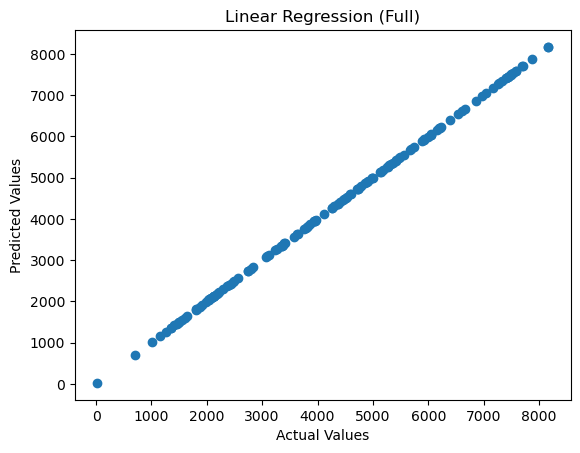

In [17]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values for Linear Regression (Full)
plt.scatter(y_test, y_pred_test_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Full)')
plt.show()

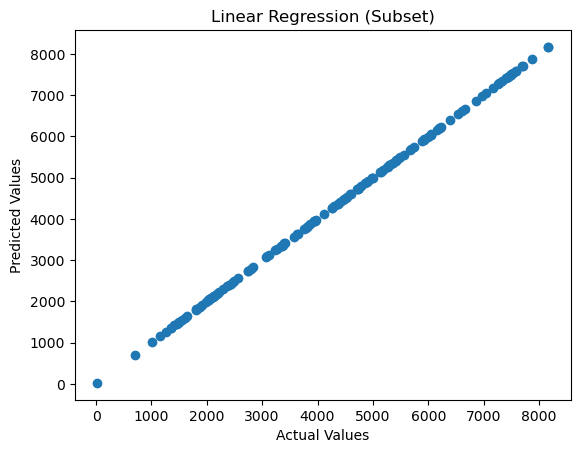

In [18]:
# Plot predictions vs actual values for Linear Regression (Subset)
plt.scatter(y_test, y_pred_test_subset)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Subset)')
plt.show()